In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Seleccionar la variable, años y porcentaje de completitud

In [34]:
var_etiquetas = ['TMX_CON', 'TMN_CON', 'PTPM_CON', 'Q_MN_D', 'Q_MEDIA_D', 'Q_MX_D', 'PT_10_TT_D']

profile_variable =  'TMX_CON'

year_ini = 2000
year_fin = 2019
variable_records_min_porc = 0.70

### Cargar archivos con los datos de las estaciones, los perfiles de las variables y la deforestación

In [19]:
cuencaestacion_path_base = r'../data/stations'
cuencaestacion_files_path = f'{cuencaestacion_path_base}/EST316C.csv'
print('Cuencas por estación:', cuencaestacion_files_path)

profiles_path_base = r'../data/variables_profiles'
profile_files_path = f'{profiles_path_base}/*{profile_variable}_estacion_year.csv'
print('Perfiles:', profile_files_path)

deforestacion_path = r'../data/variables/FCL316C.csv'
print('Deforestacion:', deforestacion_path)

Cuencas por estación: ../data/stations/EST316C.csv
Perfiles: ../data/variables_profiles/*TMX_CON_estacion_year.csv
Deforestacion: ../data/variables/FCL316C.csv


In [20]:
cuencaestacion_files = glob.glob(cuencaestacion_files_path)
print(cuencaestacion_files)

profile_files = glob.glob(profile_files_path)
print(profile_files)

profile_files = glob.glob(profile_files_path)
print(profile_files)

['../data/stations/EST316C.csv']
['../data/variables_profiles\\climatica_ordinaria_TMX_CON_estacion_year.csv']
['../data/variables_profiles\\climatica_ordinaria_TMX_CON_estacion_year.csv']


In [21]:
cuencaestacion_dtypes = {
    'COD':'category',
    'CUENCA':'category'
}
cuencaestacion_cols = ['COD', 'CUENCA']

cuencaestacion = pd.concat([pd.read_csv(file, sep=';', dtype = cuencaestacion_dtypes, usecols = cuencaestacion_cols) for file in cuencaestacion_files], axis = 0)
#cuencaestacion.rename(columns=lambda x: x.lower(), inplace=True)
cuencaestacion.rename(columns = {'COD':'codigo', 'CUENCA':'cuenca'}, inplace = True)

cuencaestacion.set_index('codigo', inplace = True)
print(cuencaestacion.shape)
cuencaestacion.head()

(3818, 1)


,cuenca
codigo,
11017010,199
11027030,198
11027050,198
11037020,197
11047010,311


In [22]:
profile_dtypes = {
    'CodigoEstacion':'category'
}

profiles = pd.concat([pd.read_csv(file, dtype = profile_dtypes) for file in profile_files], axis = 0)
profiles.rename({'CodigoEstacion':'codigo'}, axis = 1, inplace = True)
profiles.rename(columns=lambda x: 'y' + x if x.isnumeric() else x, inplace=True)
profiles.set_index('codigo', inplace = True)
print(profiles.shape)
profiles.head()

(301, 30)


,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11025010,363,362,364,353,356,358,355,352,350,357,...,352,352,310,243,204,254,359,261,266,119
11045010,285,366,363,362,364,366,362,364,364,365,...,365,366,365,365,364,366,362,364,322,31
11075010,0,325,259,234,331,338,171,304,314,302,...,57,0,0,0,0,0,0,0,0,0
11075020,360,350,355,334,353,354,352,351,352,357,...,243,21,331,73,0,0,0,91,0,0
11115020,329,242,347,364,356,366,340,112,324,204,...,0,231,340,362,282,366,273,345,364,133


### Unir perfiles con las estaciones-cuencas

In [23]:
estaciones = pd.concat([cuencaestacion, profiles], join = 'inner', axis = 1)
#estaciones[(~estaciones.cuenca.isnull()) & (~estaciones.y1991.isnull())].shape
print(estaciones.shape)
estaciones.head()

(193, 31)


,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11025010,198,363,362,364,353,356,358,355,352,350,...,352,352,310,243,204,254,359,261,266,119
11045010,311,285,366,363,362,364,366,362,364,364,...,365,366,365,365,364,366,362,364,322,31
11075020,195,360,350,355,334,353,354,352,351,352,...,243,21,331,73,0,0,0,91,0,0
11115020,191,329,242,347,364,356,366,340,112,324,...,0,231,340,362,282,366,273,345,364,133
11115040,191,362,356,363,359,358,358,348,358,359,...,319,359,356,350,355,363,304,357,282,31


### Calcular la completitud para cada estación

In [35]:
variable_records_min_days = int(365 * variable_records_min_porc)

cols_variable = ['y'+str(i) for i in range(year_ini, year_fin+1)]
print(f'Desde:{year_ini} hasta:{year_fin} %mín:{variable_records_min_porc} días mínimo:{variable_records_min_days}')

Desde:2000 hasta:2019 %mín:0.7 días mínimo:255


In [36]:
cols_variable

['y2000',
 'y2001',
 'y2002',
 'y2003',
 'y2004',
 'y2005',
 'y2006',
 'y2007',
 'y2008',
 'y2009',
 'y2010',
 'y2011',
 'y2012',
 'y2013',
 'y2014',
 'y2015',
 'y2016',
 'y2017',
 'y2018',
 'y2019']

In [38]:
estaciones[cols_variable].head()

,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
codigo,,,,,,,,,,,,,,,,,,,,
11025010,357,351,337,349,349,344,349,233,352,346,359,352,352,310,243,204,254,359,261,266
11045010,365,362,365,363,365,363,365,363,364,365,365,365,366,365,365,364,366,362,364,322
11075020,357,361,360,362,363,364,361,353,366,365,360,243,21,331,73,0,0,0,91,0
11115020,204,364,362,356,341,360,362,356,347,359,142,0,231,340,362,282,366,273,345,364
11115040,365,364,365,363,362,363,358,351,342,355,359,319,359,356,350,355,363,304,357,282


In [26]:
estaciones[f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'] = estaciones[cols_variable].apply(lambda x: len(estaciones[cols_variable].columns[x > variable_records_min_days]) / len(cols_variable) , axis = 1)
estaciones.head()

,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,TMX_CON_70_porc
codigo,,,,,,,,,,,,,,,,,,,,,
11025010,198,363,362,364,353,356,358,355,352,350,...,352,310,243,204,254,359,261,266,119,0.789474
11045010,311,285,366,363,362,364,366,362,364,364,...,366,365,365,364,366,362,364,322,31,1.000000
11075020,195,360,350,355,334,353,354,352,351,352,...,21,331,73,0,0,0,91,0,0,0.631579
11115020,191,329,242,347,364,356,366,340,112,324,...,231,340,362,282,366,273,345,364,133,0.789474
11115040,191,362,356,363,359,358,358,348,358,359,...,359,356,350,355,363,304,357,282,31,1.000000


[Text(0, 0.5, 'Estaciones'),
 Text(0.5, 0, '%'),
 Text(0.5, 1.0, 'TMX_CON % de años con registro anual mayor a 70.0% (255 días)')]

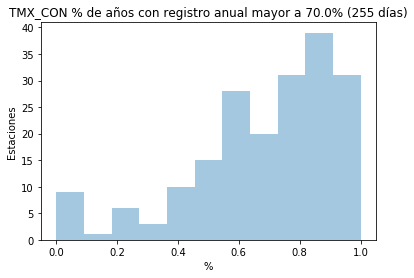

In [27]:
variable_full = f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'
ax = sns.distplot(estaciones[variable_full], kde = False)
ax.set(xlabel = '%', ylabel = 'Estaciones', 
       title = f'{profile_variable} % de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)')

In [28]:
cuencas_completitud = estaciones.groupby('cuenca')[variable_full].max().reset_index() 

Text(0.5, 0, 'cuenca')

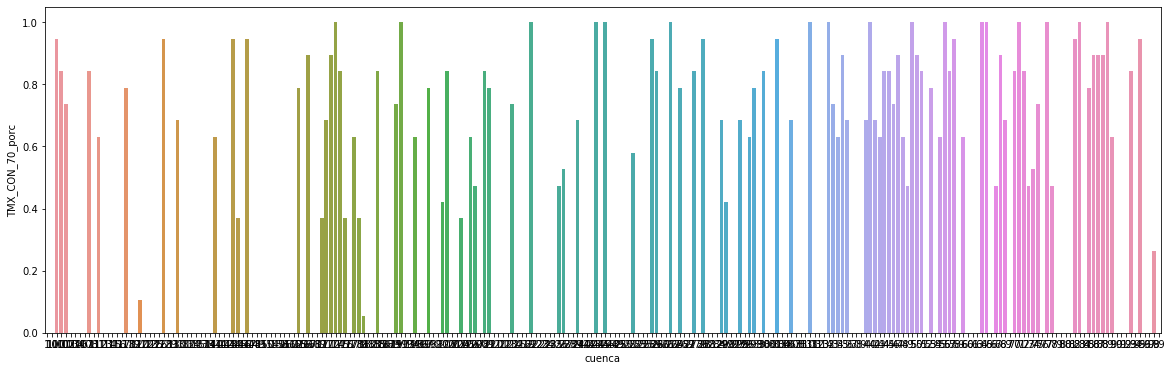

In [29]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x = 'cuenca', y = variable_full, data = cuencas_completitud)
ax.set_xlabel('cuenca')
#ax.set(xlabel = 'cuenca', ylabel = '% años', 
#       title = f'{profile_variable} por Cuenca % de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)')
#sns.despine(left=True, bottom=True)

In [30]:
variable_completitud = f'{profile_variable}_{int(variable_records_min_porc * 100)}_compl'
cuencas_completitud[variable_completitud] = cuencas_completitud[variable_full].apply(lambda x: 1 if x == 1 else 0)
print('Número de cuencas con al menos una estacion al 100% de años', cuencas_completitud[variable_completitud].value_counts()[1])

Número de cuencas con al menos una estacion al 100% de años 17


## Exportar las estaciones con el 100% de los años con al menos el 80% de los días con registro por año.

In [31]:
completeness_files_path = f'{profiles_path_base}/CUM{int(variable_records_min_porc * 100)}_{profile_variable}.csv'
print('Completitud:', completeness_files_path)

estaciones_completeness = estaciones.loc[estaciones[f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'] == 1, ['cuenca']]
estaciones_completeness['variable'] = profile_variable

print(estaciones_completeness.shape)

estaciones_completeness.to_csv(completeness_files_path)

Completitud: ../data/variables_profiles/CUM70_TMX_CON.csv
(17, 2)
